In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
# import dataset

df = pd.read_csv('../../Dataset/onehot.csv')
# drop Name Column
df.drop('Name', axis=1, inplace=True)

# randomize the rows
df = df.sample(frac=1).reset_index(drop=True)

In [3]:
df.head()

,Class,sodium,extract,alcohol,water,glycerin,glycol,acid,dimethicone,fragrance,...,tomato,pyrus,tromethamine,hedera,helix,fillers,proprietary,microcapsules,https,pinterest
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)

In [6]:
# Decision Tree

dt = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [7]:
y_predicted = dt.predict(X_test)

In [8]:
accuracy_score(y_test, y_predicted)*100

91.36363636363637

In [10]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 98,  13],
       [  6, 103]], dtype=int64)

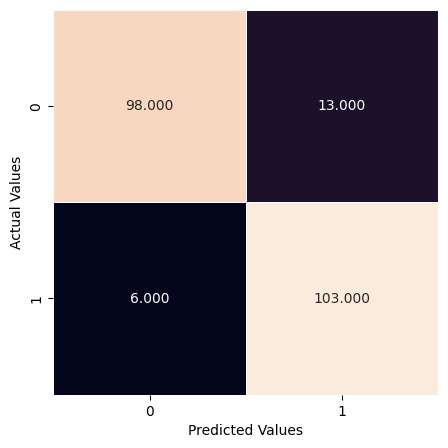

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [12]:
# Classification Report

print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.94      0.88      0.91       111
           1       0.89      0.94      0.92       109

    accuracy                           0.91       220
   macro avg       0.92      0.91      0.91       220
weighted avg       0.92      0.91      0.91       220



In [13]:
# Cross Validation Score

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 91.25 %
Standard Deviation: 2.49 %
